In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1


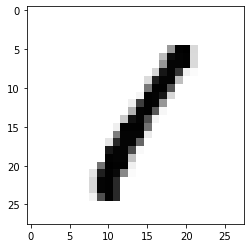

In [ ]:
import matplotlib.pyplot as plt
img_index=3
print(y_train[img_index])
plt.imshow(x_train[img_index],cmap="Greys")

In [ ]:
#reshape the data.
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#normalize the data between 0 to 1.gray_scale image lies between 0 to 255
x_train=x_train/255
x_test=x_test/255

In [ ]:
#convert dependent variable into catogorical.
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
#Design a Model.
#The “softmax” activation is used when we’d like to classify the data into a number of pre-decided classes
row_shape=28
col_shape=28
num_classes=10
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization

model= Sequential()
model.add(Conv2D(32,(3, 3),activation="relu",input_shape=(row_shape,col_shape,1)))
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(num_classes,activation="softmax"))


In [ ]:
#Compile and Train Model.
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
batch_size=128
epoch=10

model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=epoch,
          verbose=1,
          validation_data=(x_test, y_test))

score=model.evaluate(x_test,y_test,verbose=1)

print("test loss=",score[0])
print("test accuracy=",score[1])

model.save("model.h5")

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1413 - accuracy: 0.9592 - val_loss: 0.0590 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0485 - accuracy: 0.9862 - val_loss: 0.0369 - val_accuracy: 0.9878
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0299 - val_accuracy: 0.9897
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0377 - val_accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0284 - val_accuracy: 0.9923
Epoch 

In [ ]:
model.summary(line_length=100)

Model: "sequential_3"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
conv2d_6 (Conv2D)                            (None, 26, 26, 32)                      320            
____________________________________________________________________________________________________
conv2d_7 (Conv2D)                            (None, 25, 25, 64)                      8256           
____________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)               (None, 12, 12, 64)                      0              
____________________________________________________________________________________________________
dropout_6 (Dropout)                          (None, 12, 12, 64)                      0              
_____________________________________________________________________

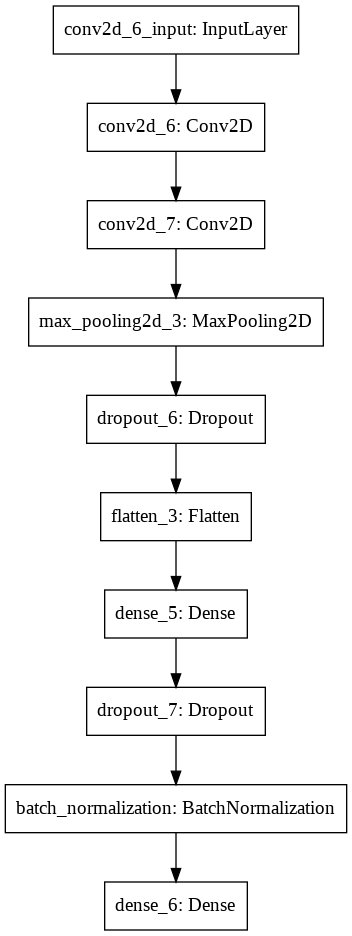

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)